In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option('display.max_rows', 100)

df = pd.read_csv('counts.csv')

GERUNDS_ONLY = 1
if GERUNDS_ONLY:
    nongerunds = ['omg_not', 'lmao_not']
    df = df.loc[~df.phrase.isin(nongerunds)]
#df = pd.read_csv('foo.csv')
df.head()

,phrase,sub,count
0,not_me_thinking,FreeCompliments,1.0
1,not_me_thinking,BravoRealHousewives,4.0
2,not_me_thinking,piercing,1.0
3,not_me_thinking,SpoiledDragRace,70.0
4,not_me_thinking,ApplyingToCollege,12.0


In [66]:
df.groupby('phrase')['count'].sum()

phrase
not_me_acting          5.0
not_me_taking         66.0
not_me_thinking      825.0
not_me_trying        227.0
not_me_using          61.0
not_them_acting       16.0
not_them_taking        5.0
not_them_thinking     23.0
not_them_trying       40.0
not_them_using        53.0
not_you_acting        33.0
not_you_taking        21.0
not_you_thinking      75.0
not_you_trying       101.0
not_you_using         65.0
Name: count, dtype: float64

In [17]:
subcounts = dict(
    SpoiledDragRace=64000,
    AskReddit=31744000,
    popheads=347000,
    rupaulsdragrace=418000,
    politics=7434000,
    news=22974000,
    thebachelor=162000,
    teenagers=2425000,
    AmItheAsshole=2631000,
    ApplyingToCollege=333000,
    queensofleague=10000,
)

In [51]:
counts = df.groupby('sub')['count'].sum().sort_values(ascending=False).head(26)
counts

sub
SpoiledDragRace        125.0
popheads                97.0
rupaulsdragrace         76.0
thebachelor             37.0
memes                   32.0
queensofleague          29.0
EDanonymemes            28.0
teenagers               25.0
ApplyingToCollege       25.0
popheadscirclejerk      25.0
BigBrother              24.0
rpdrcringe              17.0
AskReddit               17.0
RoyaleHigh_Roblox       14.0
RoyaleHighTrading       10.0
Minecraft                9.0
BravoRealHousewives      9.0
TaylorSwift              8.0
kpoprants                8.0
Genshin_Impact           7.0
interestingasfuck        7.0
RPDRDRAMA                7.0
unpopularopinion         7.0
GachaLifeCringe          6.0
QuestBridge              6.0
Choices                  6.0
Name: count, dtype: float64

In [35]:
scf = pd.DataFrame(subcounts.items())
scf.columns = ['sub', 'subscribers']

cf = pd.DataFrame(counts).reset_index()

cf = scf.merge(cf, on='sub')
cf.columns = ['subreddit', 'subscribers', 'comments']
cf

,subreddit,subscribers,comments
0,SpoiledDragRace,64000,100.0
1,AskReddit,31744000,93.0
2,popheads,347000,88.0
3,rupaulsdragrace,418000,59.0
4,politics,7434000,41.0
5,news,22974000,33.0
6,thebachelor,162000,28.0
7,teenagers,2425000,26.0
8,AmItheAsshole,2631000,24.0
9,ApplyingToCollege,333000,23.0


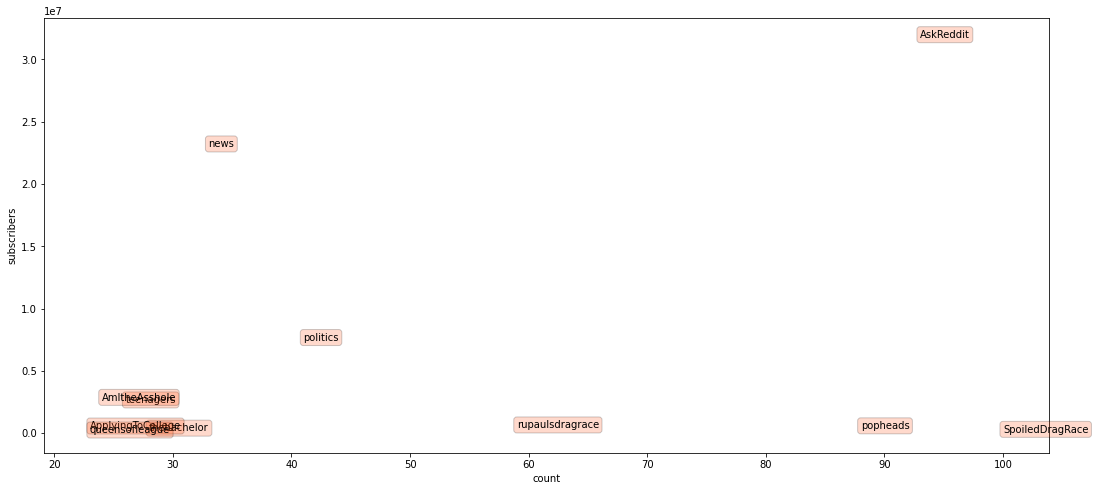

In [31]:
import seaborn as sns
FS = (18, 8)
FIG_GEN = 0
if FIG_GEN:
    FS = (9, 8)

def scatter_text(af, 
                 xcol='count', 
                 ycol='subscribers',
            adjust=0, arrow=0,
            **sns_kwargs,
           ):
    
    fig, ax = plt.subplots(figsize=FS)

    sns.scatterplot(
        data=af,
        x=xcol,
        y=ycol,
        ax=ax,
        alpha=0,
        **sns_kwargs
    )
    #ax.set_yscale('log')
    if ycol == 'cp':
        ax.invert_yaxis()
    
    texts = []
    for _, row in af.iterrows():
        aff = row['sub']
        x = row[xcol]
        y = row[ycol]
        texts.append( ax.annotate(aff, (x, y), 
                                  bbox=dict(boxstyle='round', alpha=0.2, facecolor='orangered'),
                                 ) )
    if adjust:
        iters = adjust_text(
            texts,
            expand_text=(1.05, 1.2),
            lim=100, # slooooow
        )
        print(f"adjust_text took {iters} iterations.")
    if arrow:
        xarrow = .03
        # arrow up
        ax.annotate(
            '',
            xytext=(xarrow, .65),
            xy=(xarrow, .89),
            xycoords='figure fraction',
            textcoords='figure fraction',
            arrowprops=dict(),
        )
        ax.text(
            xarrow - .015,
            .665,
            'More flexible',
            transform=fig.transFigure,
            rotation=90,
            fontsize=12,
            fontstyle='italic',
        )
    return fig, ax

scatter_text(cf);

In [34]:
cf

,sub,subscribers,comments
0,SpoiledDragRace,64000,100.0
1,AskReddit,31744000,93.0
2,popheads,347000,88.0
3,rupaulsdragrace,418000,59.0
4,politics,7434000,41.0
5,news,22974000,33.0
6,thebachelor,162000,28.0
7,teenagers,2425000,26.0
8,AmItheAsshole,2631000,24.0
9,ApplyingToCollege,333000,23.0


In [63]:
counts = df.groupby('sub')['count'].sum().sort_values(ascending=False).head(15)

import os
def pprint2(counts, link=True):
    xf = counts.copy()
    
    return xf.to_markdown(index=True)

md = pprint2(counts)
#print(md)

newmd = ''
for i, line in enumerate(md.split('\n')):
    if i < 2:
        newmd += line + '\n'
        continue
    eow = line.index(' ', 2)
    name = line[2:eow]
    url = f'https://reddit.com/r/{name}'
    newline = line[:2] + f'[{name}]({url})' + line[eow:]
    newmd += newline + '\n'
newmd = newmd[:-1]
print(newmd)

| sub                |   count |
|:-------------------|--------:|
| [SpoiledDragRace](https://reddit.com/r/SpoiledDragRace)    |     125 |
| [popheads](https://reddit.com/r/popheads)           |      97 |
| [rupaulsdragrace](https://reddit.com/r/rupaulsdragrace)    |      76 |
| [thebachelor](https://reddit.com/r/thebachelor)        |      37 |
| [memes](https://reddit.com/r/memes)              |      32 |
| [queensofleague](https://reddit.com/r/queensofleague)     |      29 |
| [EDanonymemes](https://reddit.com/r/EDanonymemes)       |      28 |
| [teenagers](https://reddit.com/r/teenagers)          |      25 |
| [ApplyingToCollege](https://reddit.com/r/ApplyingToCollege)  |      25 |
| [popheadscirclejerk](https://reddit.com/r/popheadscirclejerk) |      25 |
| [BigBrother](https://reddit.com/r/BigBrother)         |      24 |
| [rpdrcringe](https://reddit.com/r/rpdrcringe)         |      17 |
| [AskReddit](https://reddit.com/r/AskReddit)          |      17 |
| [RoyaleHigh_Roblox](https

In [37]:
import os
def pprint(df, link=True):
    xf = df.copy()
    if link:
        xf['subreddit'] = '[' + xf['subreddit'] + '](' + 'https://reddit.com/r/' + xf['subreddit'] + ')'
    xf['comments'] = xf['comments'].astype(int)
    xf['subscribers'] = xf['subscribers'].apply(lambda n: '{:,}'.format(n))
    
    cols = ['subreddit', 'comments', 'subscribers']
    return xf.loc[:, cols].to_markdown(index=False)

md = pprint(cf)
print(md)

| subreddit                                                   |   comments | subscribers   |
|:------------------------------------------------------------|-----------:|:--------------|
| [SpoiledDragRace](https://reddit.com/r/SpoiledDragRace)     |        100 | 64,000        |
| [AskReddit](https://reddit.com/r/AskReddit)                 |         93 | 31,744,000    |
| [popheads](https://reddit.com/r/popheads)                   |         88 | 347,000       |
| [rupaulsdragrace](https://reddit.com/r/rupaulsdragrace)     |         59 | 418,000       |
| [politics](https://reddit.com/r/politics)                   |         41 | 7,434,000     |
| [news](https://reddit.com/r/news)                           |         33 | 22,974,000    |
| [thebachelor](https://reddit.com/r/thebachelor)             |         28 | 162,000       |
| [teenagers](https://reddit.com/r/teenagers)                 |         26 | 2,425,000     |
| [AmItheAsshole](https://reddit.com/r/AmItheAsshole)         |       

In [64]:
MD_DIR = os.path.expanduser('~/src/colinmorris.github.com/_includes/not/')
path = os.path.join(MD_DIR, 'subreddit_counts.md')
with open(path, 'w') as f:
    f.write(newmd)